# CNN을 이용한 멀웨어 분류

이 코드는**Convolutional Neural Network** (이하 CNN)을 이용해서 Malimg 데이터셋의 멀웨어들을 **Multiclass classification** 할 것이다. 이 데이터셋의 출처는 L. Nataraj, S. Karthikeyan, G. Jacob and B. S. Manjunath.의 **Malware Images: Visualization and Automatic Classification** 이다.


# Data : 
멀웨어는 다음 클래스들로 분류할 수 있다 : 
 * Adialer.C
 * Agent.FYI
 * Allaple.A
 * Allaple.L
 * Alueron.gen!J
 * Autorun.K
 * C2LOP.P
 * C2LOP.gen!g
 * Dialplatform.B
 * Dontovo.A
 * Fakerean
 * Instantaccess
 * Lolyda.AA1
 * Lolyda.AA2
 * Lolyda.AA3
 * Lolyda.AT
 * Malex.gen!J
 * Obfuscator.AD
 * Rbot!gen
 * Skintrim.N
 * Swizzor.gen!E
 * Swizzor.gen!I
 * VB.AT
 * Wintrim.BX
 * Yuner.A

# 전처리 - 이미지로 변환

**Malimg dataset**은 이미 멀웨어 이미지들을 포함하고 있으므로 다음 [데이터셋](https://www.kaggle.com/c/malware-classification/data?select=train.7z)을 이용해 멀웨어를 이미지로 변환하는 것을 보일 것이다. 각 파일의 raw data는 그 파일의 바이너리 내용을 십육진법으로 나타낸다. 목표는 그 파일들을 PNG 이미지로 변환하는 것이다.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

os.chdir('/content/drive/My Drive/Colab Notebooks/Malware Classification')
%pwd

'/content/drive/My Drive/Colab Notebooks/Malware Classification'

Raw 멀웨어들은 다음 폴더에 저장될 것이다:

In [ ]:
root = "/content/drive/My Drive/Colab Notebooks/Malware Classification/dataRaw/"

다음 함수는 'data' 폴더의 **.bytes** 형식의 십육진 파일들을 PNG 이미지로 변환한다.

files :  ['0A32eTdBKayjCWhZqDOQ.bytes', '0ACDbR5M3ZhBJajygTuf.bytes', 'malimg_dataset', '\\0A32eTdBKayjCWhZqDOQ.bytes.png', '\\0ACDbR5M3ZhBJajygTuf.bytes.png']
Processing 0A32eTdBKayjCWhZqDOQ.bytes
Processing 0ACDbR5M3ZhBJajygTuf.bytes


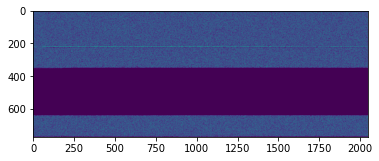

In [ ]:
import sys  ##파이썬 인터프리터가 제공하는 변수화 함수를 직접 제어할 수 있게 해주는 모듈##
import os   ##운영체제에서 제공되는 여러 기능을 수행할 수 있게 해주는 모듈##
from math import log  ##복잡한 연산이 필요할 때 사용하는 모듈##
import numpy as np    ##대규모 다차원 배열과 행렬 연산에 필요한 함수를 제공하는 모듈##

import scipy as sp    ##과학(계산)적 컴퓨팅 영역의 여러 기본적인 작업을 위한 라이브러리##
from PIL import Image ##다양한 이미지 파일 형식을 지원하며 강력한 이미지 처리와 그래픽 기능을 제공하는 이미지프로세싱 라이브러리##

import matplotlib.pyplot as plt ##자료를 시각화할 수 있게 해주는 모듈##

## 십육진 파일을 PNG 이미지로 처리하는 함수##
def convertAndSave(array,name):
    print('Processing '+name)
    if array.shape[1]!=16: #십육진 파일이 아니라면 처리하지 않음
        assert(False)
    b=int((array.shape[0]*16)**(0.5))
    b=2**(int(log(b)/log(2))+1)  ##b=2^(log_2⁡〖array.shape[0]〗/2+2)
    a=int(array.shape[0]*16/b)   
    array=array[:a*b//16,:]   ##행의 인덱스가 a*b//16미만인 값
    array=np.reshape(array,(a,b))   ##array의 차원 재배열
    im = Image.fromarray(np.uint8(array))   ##배열 객체 array를 uint8타입으로 변환시켜 입력받아 배열 객체에서 만든 이미지 객체 반환
    im.save(root+'\\'+name+'.png', "PNG")   ##이미지 jpg로 저장
    return im

#root디렉토리 내의 파일들
files=os.listdir(root)
print('files : ',files)
#파일들을 하나하나 처리
for counter, name in enumerate(files):    
        #지정된 폴더 안의 .bytes 형식의 파일들을 처리함
        if '.bytes' != name[-6:]:   ##.bytes 파일이 name배열 뒤에서 6번째면 건너뛰기
            continue
        f=open(root+'/'+name)   ##
        array=[]    ##빈 배열 생성
        for line in f:
            xx=line.split()   ##문자열 나누기
            if len(xx)!=17:   ##문자열의 길이가 17이 아니라면 건너뛰기
                continue
            array.append([int(i,16) if i!='??' else 0 for i in xx[1:] ])  ##i가 '??' 아니라면 array에 i를 16진수로 변환하여 추가하고 '??'이 맞다면 xx배열의 크기에서 1을 뺀만큼 0을 객체로 추가 
        plt.imshow(convertAndSave(np.array(array),name))    ##name파일명을 np.array(array)이미지 창으로 보여준다.
        del array   ##배열 삭제
        f.close()   ##파일 포인터 닫기

이 방법으로 멀웨어 이미지 데이터셋을 생성할 수 있다.

저장 공간도 부족하고 처리 시간을 줄이기 위해 모든 데이터셋을 처리하지 않고 이미 이미지로 변환된 멀웨어들이 있는 **Malming dataset**을 활용할 것이다.

각 멀웨어 이미지는 해당하는 클래스의 하위 폴더에 배정된다.

# 전처리 - 데이터셋 생성

path_root에 새로운 폴더의 경로를 지정한다.

In [ ]:
path_root = "/content/drive/My Drive/Colab Notebooks/Malware Classification/dataRaw/malimg_dataset/malimg_paper_dataset_imgs/"

이 이미지들을 테스트에 쓰기 위해 각 디렉토리로부터 정규화된 tensor 이미지들을 생성하는 **ImageDataGenerator.flow_from_directory()** 함수를 사용할 것이다.
  * **target_size** : 모든 이미지들을 특정한 사이즈로 조정한다. 이 경우 (64*64)로 조정.
  * **batch_size(나눠진 데이터셋 크기)** : 사용할 batch의 크기. 9349개의 이미지가 있으므로 이보다 크게 batch 크기를 잡아도 바뀌는 것은 없다.

In [ ]:
from keras.preprocessing.image import ImageDataGenerator  ##실시간 데이터 증강을 사용해서 텐서 이미지 데이터 배치를 생성
batches = ImageDataGenerator().flow_from_directory(directory=path_root, target_size=(64,64), batch_size=10000)  ##flow_from_directory() : 이미지를 불러올 때 폴더명에 맞춰 자동으로 labelling

Found 9349 images belonging to 25 classes.


25개의 클래스에 해당하는 9349개의 이미지들을 찾았다.

25개의 클래스가 잘 인식된 것을 확인할 수 있다. 이것을 다시 사전순으로 나열하자.

In [ ]:
batches.class_indices   ##매핑을 검사

{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

**ImageDataGenerator.flow_from_directory()**로 생성된 **batch**는 iterator다. 따라서 **next()**를 사용해서 각 원소들을 방문해 이미지와 label의 **batch**를 생성할 수 있다.

In [ ]:
imgs, labels = next(batches)  ##기본값을 지정해 반복이 끝나더라도 StopIteration이 발생하지 않고 기본값을 출력

이미지들은 64x64 [width x length x depth] 모양의 RGB로 되어 있다.

In [ ]:
imgs.shape  ##배열의 형태를 튜플로 반환

(9349, 64, 64, 3)

**Label**은 [batch_size, 클래스 수]로 되어 있다.

In [ ]:
labels.shape  ##배열의 형태를 튜플로 반환

(9349, 25)

다음 방법은 데이터셋의 이미지 샘플을 구별할 수 있게 해준다.

In [ ]:
# jupyter notebook 내의 레이블이 있는 이미지를 플롯함
def plots(ims, figsize=(20,30), rows=10, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:  #ims[0]의 데이터 타입이 ndarray와 같다면
        ims = np.array(ims).astype(np.uint8)  ##배열의 ims번째 원소를 부호 없는 8비트 정수형으로 데이터 타입 변경
        if (ims.shape[-1] != 3):    ##img의 마지막 행이 3이 아니라면
            ims = ims.transpose((0,2,3,1))    ##배열 모양이 (w, x, y, z)에서 (w, y, z, x)로 바뀐다.
    f = plt.figure(figsize=figsize)   ##figure를 만드는 함수. figure number = figsize, figure 사이즈 = (20, 30) (단위 : 인치)
    cols = 10 # len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(0,50):
        sp = f.add_subplot(rows, cols, i+1)   ##f에 서브 플롯 추가. sp = (rows*cols)크기의 subplot 중 i+1번째 subplot
        sp.axis('Off')    ##sp의 축과 라벨 삭제
        if titles is not None:
            sp.set_title(list(batches.class_indices.keys())[np.argmax(titles[i])], fontsize=16)   ##서브플롯에 batches에 레이블로 매핑을 한 것을 크기가 titles[i] 요소 중 최대값인 리스트로 만들어 타이틀에 추가. 폰트 사이즈 16
        plt.imshow(ims[i], interpolation=None if interp else 'none')  ##이미지 출력. 이미지 창 이름: ims[i], 파일명: None/none

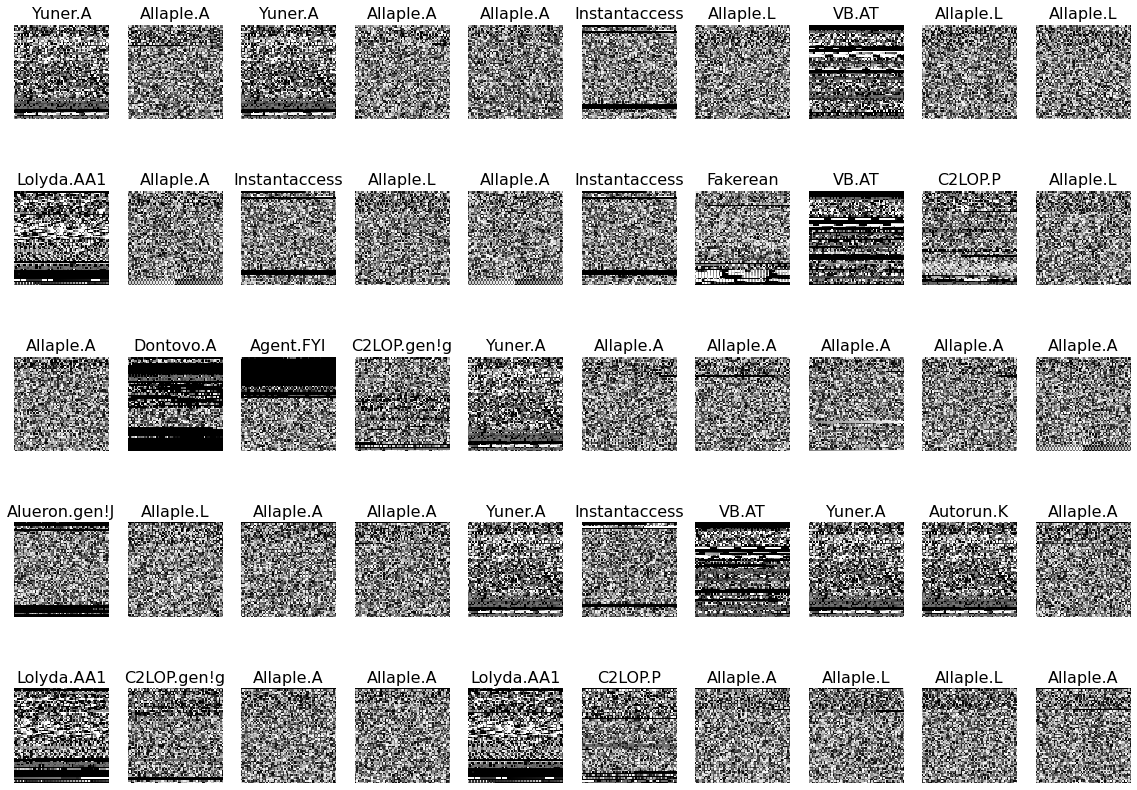

In [ ]:
plots(imgs, titles = labels)

클래스들 간 차이를 시각적으로 확인할 수 있다.

# Analyse 

모든 이미지들이 사용할 준비가 되었다. 클래스 간 데이터의 재분할을 확인하자.

In [ ]:
classes = batches.class_indices.keys()

In [ ]:
perc = (sum(labels)/labels.shape[0])*100

<BarContainer object of 25 artists>

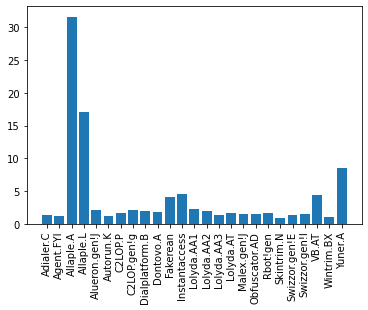

In [ ]:
plt.xticks(rotation='vertical')   ##x축에 눈금 표시
plt.bar(classes,perc)     ## classes : 막대그래프 개수, perc : 각 원소의 y값

데이터셋이 균일하지 않다는 것이 보인다 : 많은 멀웨어들이 클래스 2 : **Allaple.A** 와 클래스 3 : **Allaple.L** !에 몰려있는 것을 알 수 있다. 이에 대해서는 뒤에 조치를 취할 것이다. 

# **Train and Test**

70%의 Train, 30%의 Test로 나눠줘 학습을하였다.

In [ ]:
from sklearn.model_selection import train_test_split    ##기계학습과 데이터 분석 툴 중 데이터 분할을 위한 함수
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)  

In [ ]:
X_train.shape   ##데이터(x) 차원 확인

(6544, 64, 64, 3)

In [ ]:
X_test.shape  ##데이터(x)만 넣었을 때의 반환값의 차원 확인

(2805, 64, 64, 3)

In [ ]:
y_train.shape   ##레이블(y) 차원 확인

(6544, 25)

In [ ]:
y_test.shape    ##레이블(y)만 넣었을 때의 반환값의 차원 확인

(2805, 25)

## 합성곱 뉴럴 네트워크 모델

Keras를 이용해 **CNN** 모델을 직접 제작했다. 이 모델은 다음 layer로 되어 있다 :

* **Convolutional Layer** : 30 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **Convolutional Layer** : 15 filters, (3 * 3) kernel size
* **Max Pooling Layer** : (2 * 2) pool size
* **DropOut Layer** : Dropping 25% of neurons.
* **Flatten Layer**
* **Dense/Fully Connected Layer** : 128 Neurons, Relu activation function
* **DropOut Layer** : Dropping 50% of neurons.
* **Dense/Fully Connected Layer** : 50 Neurons, Softmax activation function
* **Dense/Fully Connected Layer** : num_class Neurons, Softmax activation function

**Input shape** : 64 * 64 * 3

In [ ]:
import keras
from keras.models import Sequential, Input, Model   ##sequential: 선언한 뒤 layer를 단계적으로 추가 input: 입력 크기 정의. Model: 입력과 출력 정의
from keras.layers import Dense, Dropout, Flatten    ##layer:케라스에서 사용되는 레이어의 핵심 데이터 구조인 모델을 구성하는 것. dense: 전결합층을 추가. dropout: training time동안 입력값을 무작위적으로 0으로 설정. flatten: 입력값이 (batch,)형태면 채널 차원을 추가해서 (batch, 1)이 출력값이 됨
from keras.layers import Conv2D, MaxPooling2D     ##conv2d: convolution kernel 생성. MaxPooling2D: 공간 차원과 함께 입력값을 다운샘플링한다.
from keras.layers.normalization import BatchNormalization   ##레이어의 선형함수를 계산

**25**개의 클래스들이 도출되어야 한다.

In [ ]:
num_classes = 25

모델 제작

In [ ]:
def malware_model():
    Malware_model = Sequential()  ##layer를 구성
    Malware_model.add(Conv2D(30, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(64,64,3)))  ##layer를 추가. Conv2D - 30: 필터, kernel_size:(3,3), activation: 정류 된 선형 단위 적용, input shape: (channels=64, 행=64, 열=3)

    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))   ##MaxPooling2D - pool_size: 최대값을 2x2 풀링 창보다 우선적으로 받음. ->layer 추가
    Malware_model.add(Conv2D(15, (3, 3), activation='relu'))  ##Conv2D - filters(출력 공간의 차원):15, kernel_size(3,3), activation: 정류된 선형 단위 적용  ->layer 추가
    Malware_model.add(MaxPooling2D(pool_size=(2, 2)))   ##MaxPooling2D - (2,2)인 풀링 창 생성 후 layer 추가
    Malware_model.add(Dropout(0.25))    ##0.25의 주기로 입력값을 무작위로 0으로 설정하는 layer 추가
    Malware_model.add(Flatten())    ##Flatten 후 layer 추가
    Malware_model.add(Dense(128, activation='relu'))  ##Dense - input(출력 공간의 차원): 128, activation: 정류된 선형 단위 적용 ->layer 추가 
    Malware_model.add(Dropout(0.5)) ##0.5의 주기로 입력값을 무작위로 0으로 설정하는 layer 추가
    Malware_model.add(Dense(50, activation='relu'))   ##input: 50, activation: 정류된 선형 단위 적용 ->layer 추가 
    Malware_model.add(Dense(num_classes, activation='softmax'))   ##input: num_classes, activation: softmax(벡터를 확률 분포로 변환) ->layer 추가
    Malware_model.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])  ##모델을 기계가 이해할 수 있도록 컴파일. loss: 훈련 과정에서 사용할 손실 함수. categorical_crossentropy: 범주형 교차 엔트로피. optimizer: 훈련 과정을 설정하는 문자열. metrics: 훈련을 모니터링하기 위한 지표
    return Malware_model

In [ ]:
Malware_model = malware_model()

In [ ]:
Malware_model.summary()   ##연속형 변수 요약통계

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 30)        840       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 30)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 15)        4065      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 15)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 15)        0         
_________________________________________________________________
flatten (Flatten)            (None, 2940)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               3

이 방법은 불균형한 데이터를 제대로 활용하기 위해 비주류 클래스의 비중을 늘리고 주류 클래스의 비중을 줄였다.

**class_weights** 는 y값을 사용하여 입력 데이터의 클래스 빈도에 반비례하는 가중치를 자동으로 조정한다. 이 방법을 사용하려면 y_train은 One-Hot Encoding이 되지 않았어야 한다.

In [ ]:
y_train.shape   ##레이블(y) 차원 확인

(6544, 25)

**class_weight** 함수는 One-Hot Encoding이 된 y값은 처리하지 못하므로 변환해야 한다.

In [ ]:
y_train_new = np.argmax(y_train, axis=1)    ##y_train_new = y_train의 열에서 가장 큰 값

In [ ]:
y_train_new

array([24, 17, 18, ..., 22,  7, 24])

In [ ]:
from sklearn.utils import class_weight    

class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_new),y_train_new)
#class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train_new), y = y_train_new)
##불균형한 데이터셋의 class weight를 예측. 'balanced': class weight는 n_samples/(n_classes*np.bincounty(y_train_new)). np.unique(y_train_new): 데이터에서 일어나는 클래스의 배열. y_train_new: 샘플당 고유한 클래스 라벨의 배열

In [ ]:
Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)
##Malware_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,  class_weight=class_weights)
##X_train: 훈련 데이터, y_train: 지도 학습에서 레이블 데이터, validation data: 검증 데이터, epochs: 총 훈련 횟수=10

Epoch 1/10
205/205 [==============================] - 44s 9ms/step - loss: 2.1988 - accuracy: 0.3915 - val_loss: 0.8419 - val_accuracy: 0.6909
Epoch 2/10
205/205 [==============================] - 1s 6ms/step - loss: 0.9125 - accuracy: 0.6990 - val_loss: 0.5708 - val_accuracy: 0.8057
Epoch 3/10
205/205 [==============================] - 1s 6ms/step - loss: 0.5810 - accuracy: 0.8161 - val_loss: 0.2791 - val_accuracy: 0.9169
Epoch 4/10
205/205 [==============================] - 1s 6ms/step - loss: 0.4263 - accuracy: 0.8640 - val_loss: 0.2100 - val_accuracy: 0.9358
Epoch 5/10
205/205 [==============================] - 1s 6ms/step - loss: 0.3303 - accuracy: 0.8891 - val_loss: 0.1939 - val_accuracy: 0.9426
Epoch 6/10
205/205 [==============================] - 1s 6ms/step - loss: 0.3040 - accuracy: 0.8998 - val_loss: 0.1708 - val_accuracy: 0.9497
Epoch 7/10
205/205 [==============================] - 1s 6ms/step - loss: 0.2836 - accuracy: 0.9082 - val_loss: 0.1621 - val_accuracy: 0.9433
Epoch

In [ ]:
scores = Malware_model.evaluate(X_test, y_test) ##X_text: 테스트 데이터, y_test: 지도 학습에서 레이블 테스트 데이터

88/88 [==============================] - 0s 3ms/step - loss: 0.1545 - accuracy: 0.9540


최종 정확도는 다음과 같다.

In [ ]:
print('Final CNN accuracy: ', scores[1])

Final CNN accuracy:  0.9540106654167175


# 오차 행렬

결과를 분석하자.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
y_pred = Malware_model.predict_classes(X_test, verbose=0) ##입력값에 대한 예측 클래스 생성. X_test: 입력값, verbose=0

/usr/local/lib/python3.7/dist-packages/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
y_pred

array([24,  2,  2, ..., 16, 12, 22])

In [ ]:
y_test2 = np.argmax(y_test, axis=1) ##y_test2=y_test의 열에서 가장 큰 값

In [ ]:
y_test2

array([24,  2,  2, ..., 16, 12, 22])

In [ ]:
from sklearn import metrics
c_matrix = metrics.confusion_matrix(y_test2, y_pred)  ##오차 행렬을 계산해서 분류의 정확도 계산. y_test2: 실제값, y_pred: 예측값

In [ ]:
import seaborn as sns ##데이터 시각화
def confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=14):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
    """
    df_cm = pd.DataFrame(
        confusion_matrix, index=class_names, columns=class_names, 
    )   ##2차원의 크기가 변경이 가능한 이기종 표 형식 데이터.
    ##confusion_matrix: 입력값, index=class_names: 결과 프레임에 쓰일 인덱스, columns=class_names: 결과 프레임에 쓰일 열 레이블
    fig = plt.figure(figsize=figsize) #새로운 figure 생성. figsize=figsize: 너비, 높이(단위: 인치)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d") ##히트맵을 그리는 함수. df_cm: 2차원 데이터셋, annot=True: 데이터값을 각 칸에 입력. fmt="d": 주석을 추가 할 때 사용할 문자열 형식화 코드
    except ValueError:  ##예외적으로 오류 처리
        raise ValueError("Confusion matrix values must be integers.") ##오류 강제로 발생
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)   ##눈금 레이블의 텍스트값 지정. heatmap.yaxis.get_ticklabels(): 텍스트 리턴, rotation=0: y축 틱 라벨들에 변화 없음, fontsize=14(default)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)  ##눈금 레이블의 텍스트값 지정. heatmap.yaxis.get_ticklabels(): 텍스트 리턴, rotation=0: x축 틱 라벨들에 변화 없음, fontsize=14(default)
    plt.ylabel('True label')  ##그래프의 y축에 대한 레이블 표시
    plt.xlabel('Predicted label')   ##그래프의 x축에 대한 레이블 표시

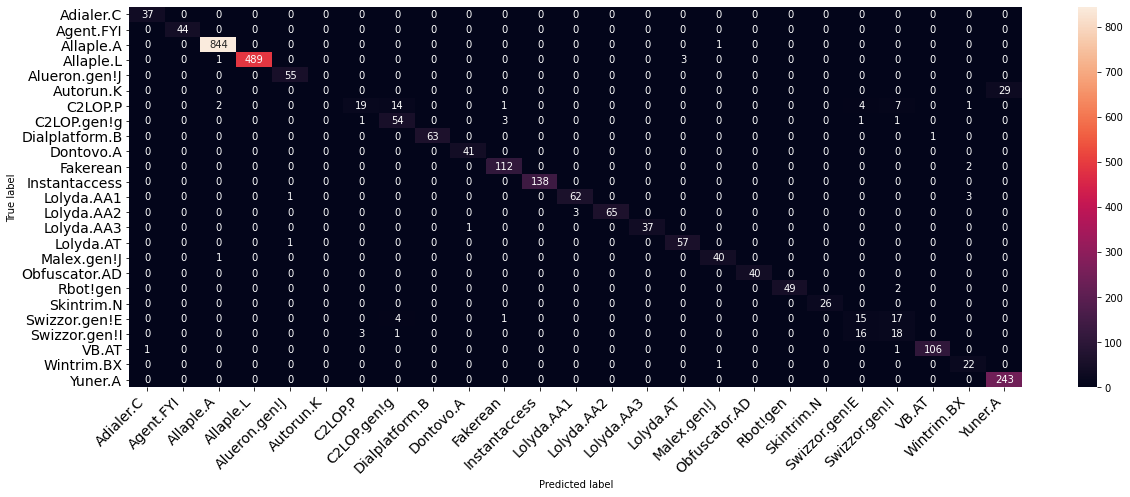

In [ ]:
class_names= batches.class_indices.keys()
confusion_matrix(c_matrix, class_names, figsize = (20,7), fontsize=14)


**여기는 고찰인데 자료조사팀에서 정정해주면될거같아요. **

이것은 오차행렬이다. 대부분의 멀웨어들이 제대로 분류가 된 것을 확인할 수 있다. **Autorun.K** 는 계속해서 **Yuner.A**로 오판됐다. 이는 **Autorun.K** 의 부족한 샘플이 원인일 가능성이 높다. **Swizzor.gen!E** 는 **Swizzor.gen!l**으로 잘못 분류된 빈도수가 높은데, 이 현상은 이 둘은 매우 비슷한 패밀리에 속하기 때문에 비슷한 점이 많기 때문에 발생한 것으로 보인다.